<a href="https://colab.research.google.com/github/yash1thsa/machine_learning_pipelines/blob/main/AIML_ML_Project_full_code_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn scikit-learn sklearn-pandas -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split, cross_val_score

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Loan_Modelling.csv')

## Data Overview

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.shape

(5000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop('ID', axis=1)

**Observations**

**1. Column Profile:**

- *Numerical (Continuous):* Age, Experience, Income, CCAvg, Mortgage
- *Categorical (Binary):* Securities_Account, CD_Account, Online, CreditCard
- *Categorical (Ordinal):* Education, Family
- *Categorical (Nominal):* ZIPCode
- *Target Variable:* Personal_Loan
- *Identifier:* ID (can be dropped)

**2. Dataset profile**
- Had 5000 rows and 14 columns
- All columns are numerical



**Sanity checks**
- There are no duplicate rows
- There are no null values in any of the columns
- There are negative values in experience columns
- Removed ID column as it is a identifier
- Zip code can be simplified to just cover for the area code



## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
#Explore all experience values as there was negative values
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
# Fix all the negative values to positive for experience column
df['Experience'] = df['Experience'].abs()
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [ ]:
#Explore all possible values for family column
df['Family'].unique()

array([4, 3, 1, 2])

In [ ]:
#Explore all possible values for education column
df['Education'].unique()

array([1, 2, 3])

In [ ]:
#Tag all category datatype
categorical_columns = ['Education', 'Personal_Loan', 'Family', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

df[categorical_columns] = df[categorical_columns].astype("category")
df.dtypes


,0
Age,int64
Experience,int64
Income,int64
ZIPCode,int64
Family,category
CCAvg,float64
Education,category
Mortgage,int64
Personal_Loan,category
Securities_Account,category


In [ ]:
#Analyze zipcode column to restrict to just area code

df['ZIPCode'].unique()
df['ZIPCode'] = df['ZIPCode'].astype(str).str.slice(0, 2)
df['ZIPCode'].unique()
df["ZIPCode"] = df["ZIPCode"].astype("category")

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

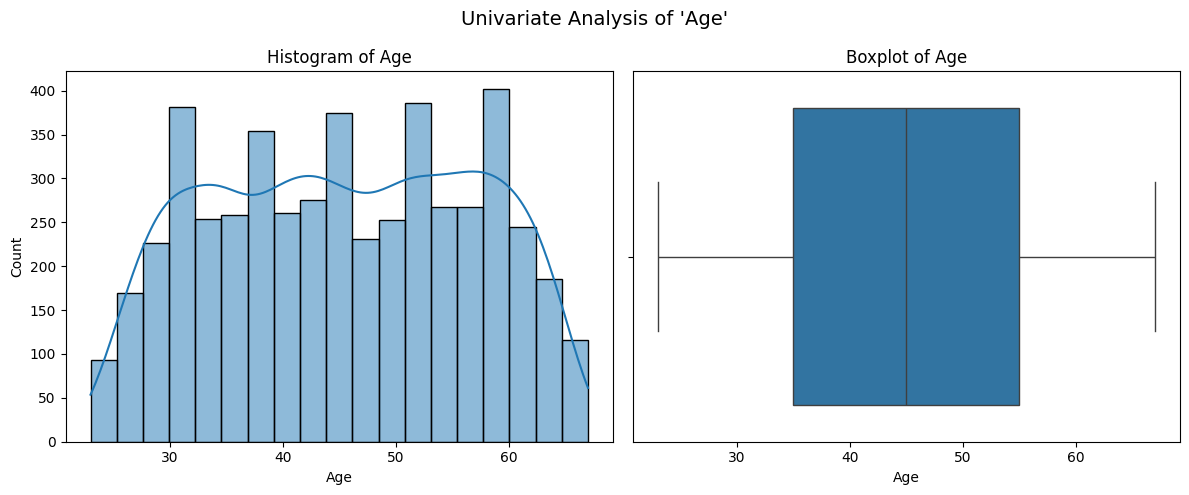

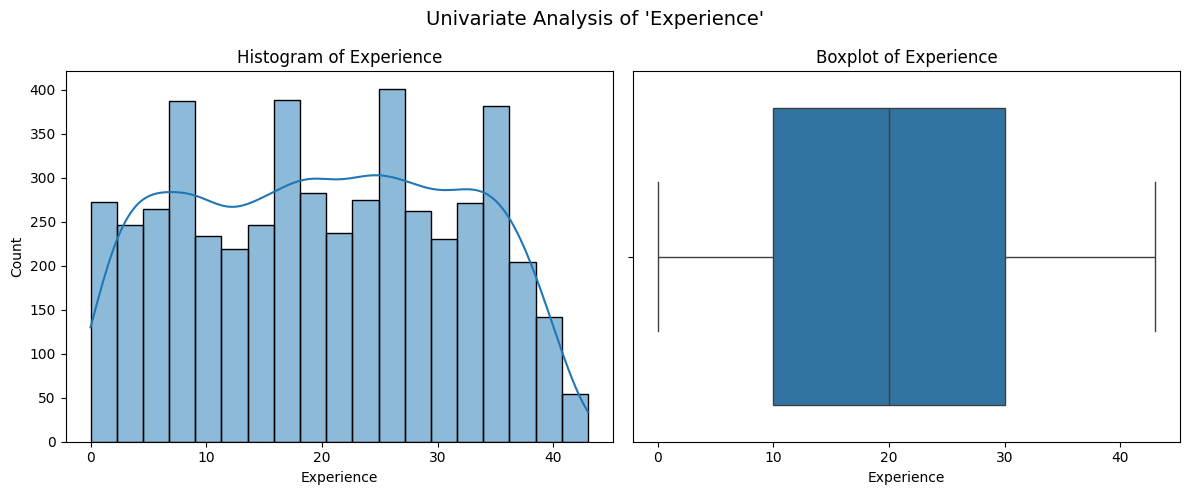

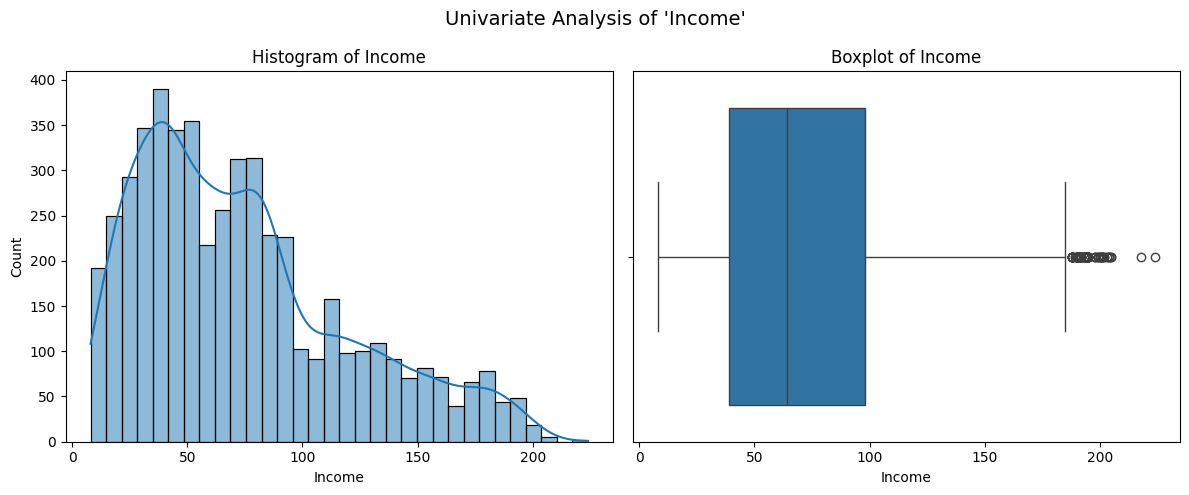

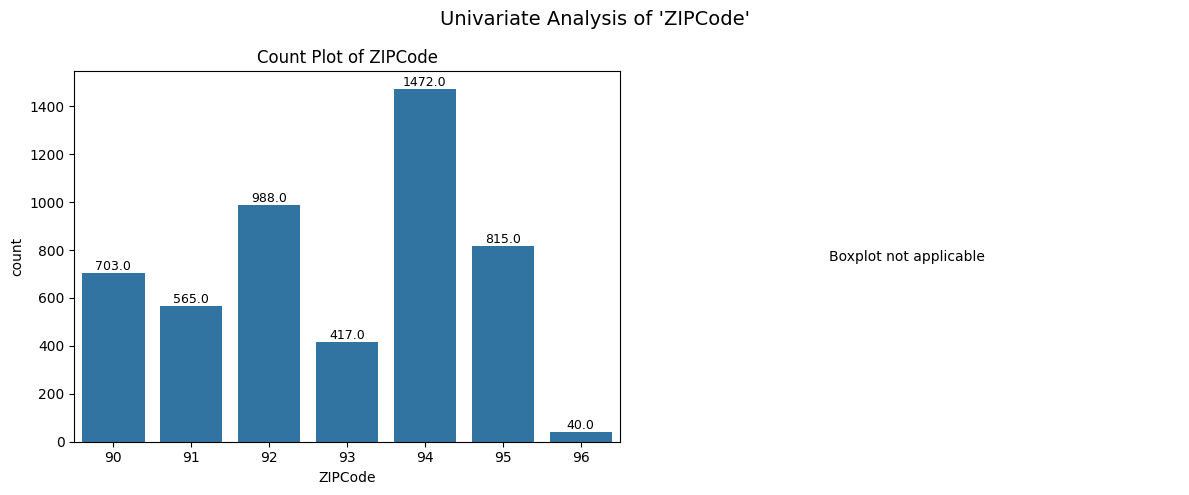

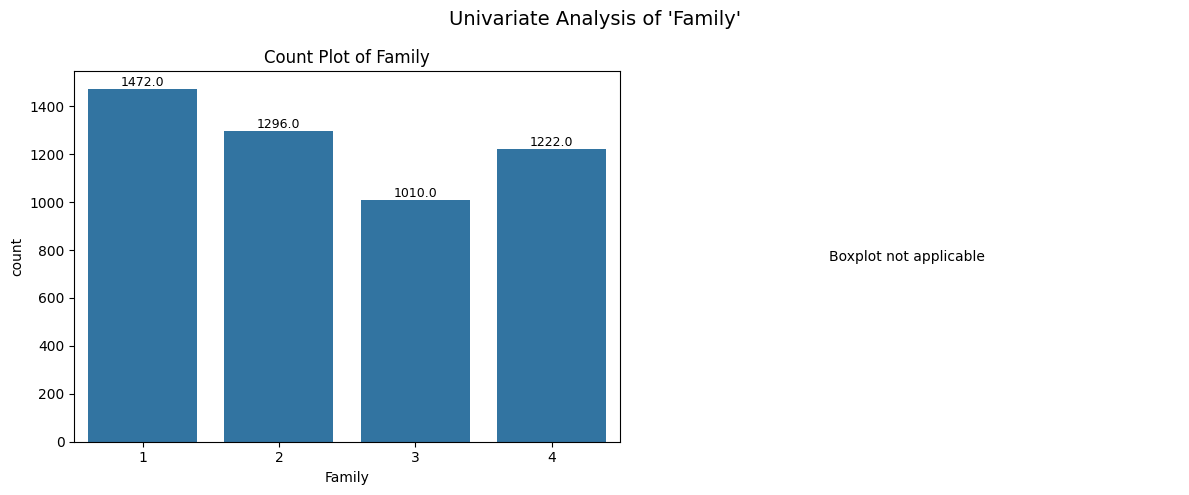

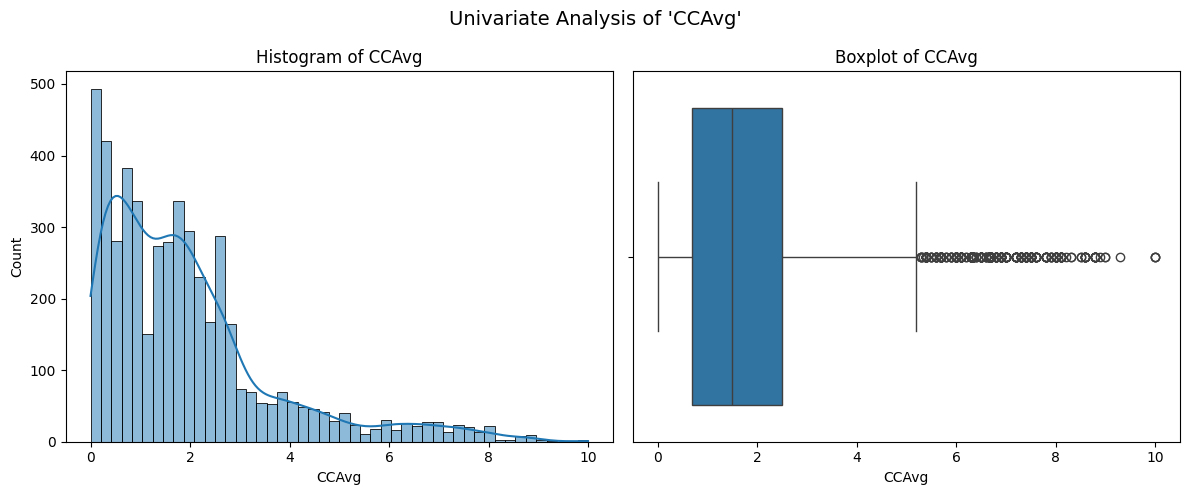

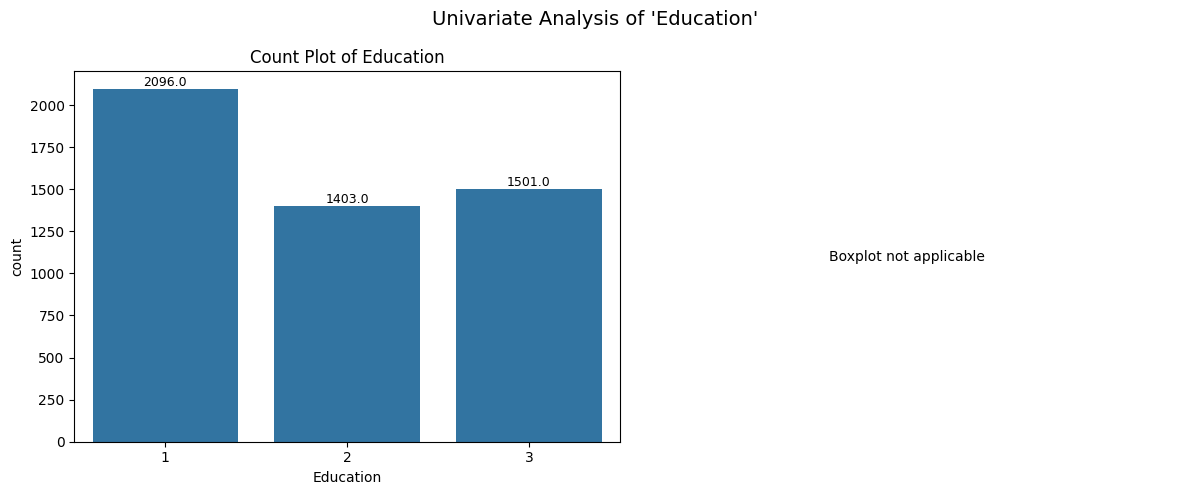

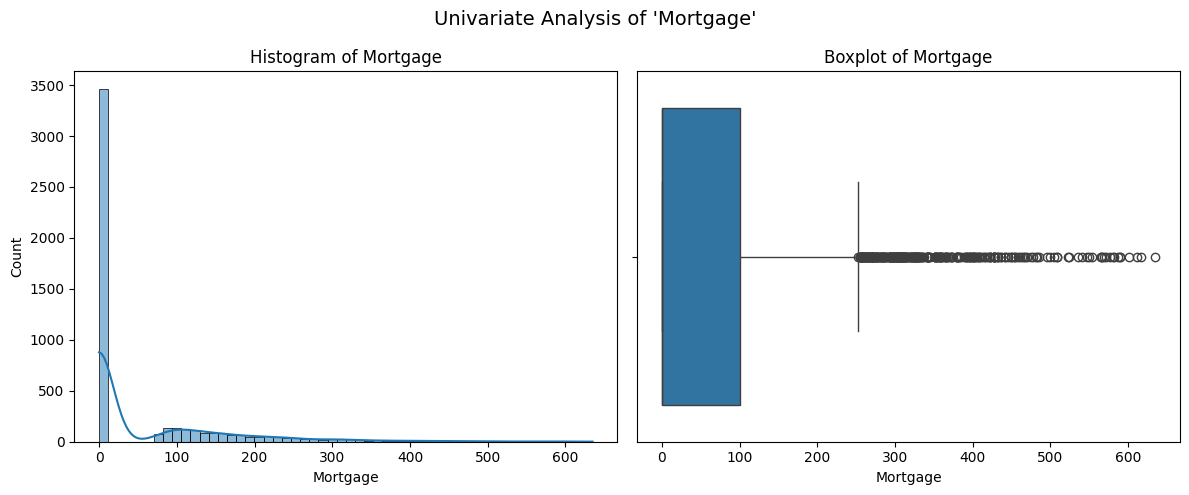

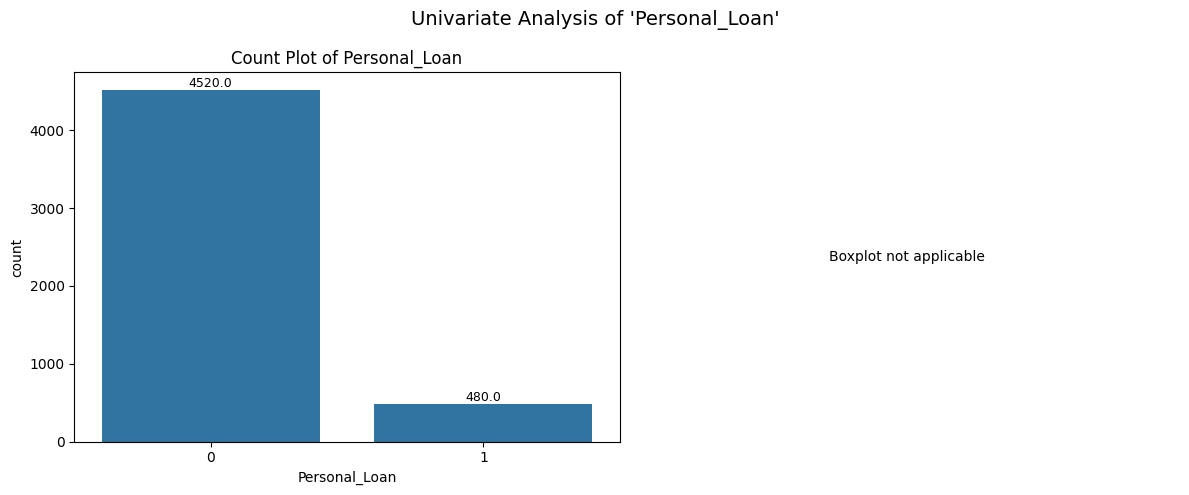

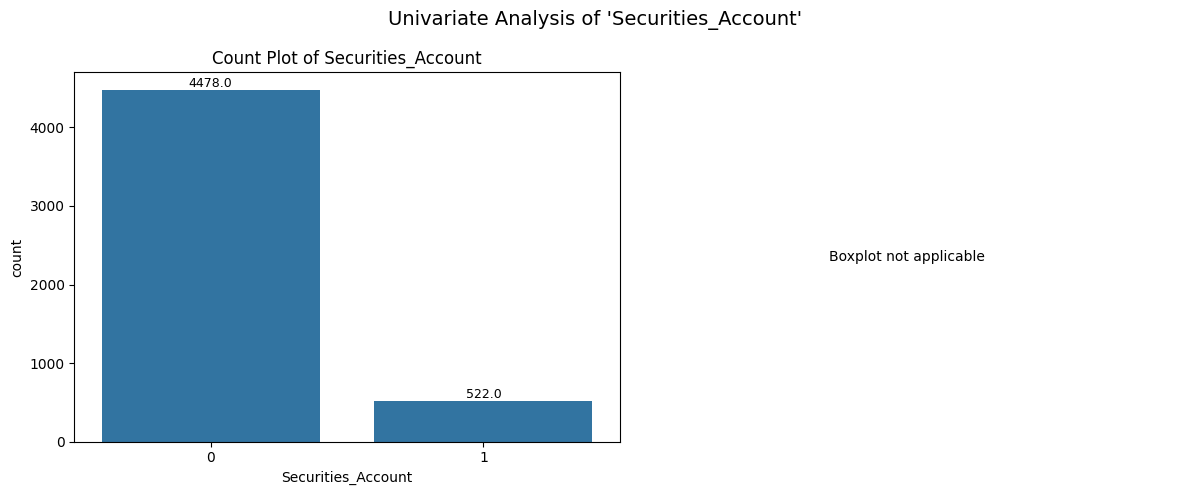

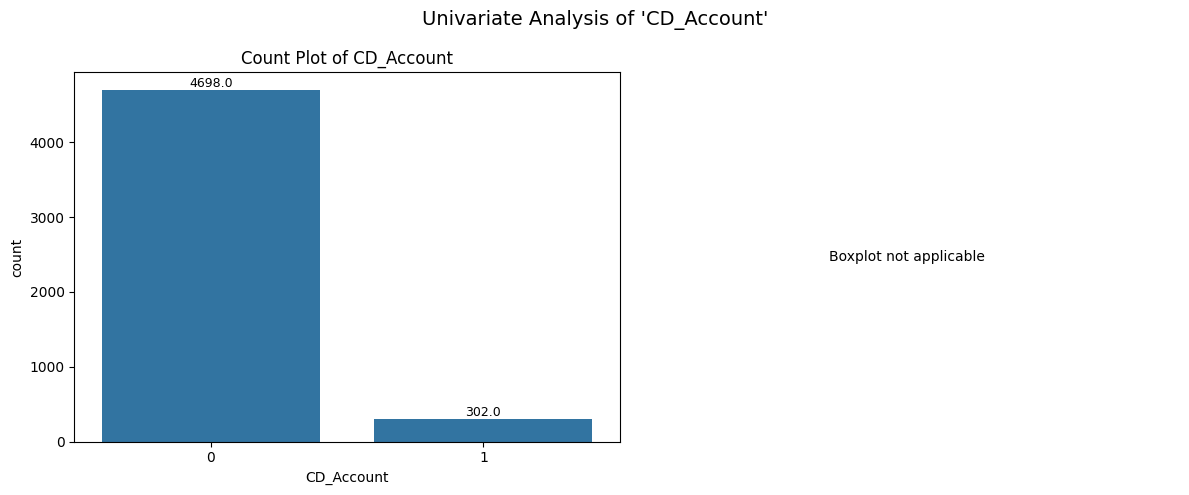

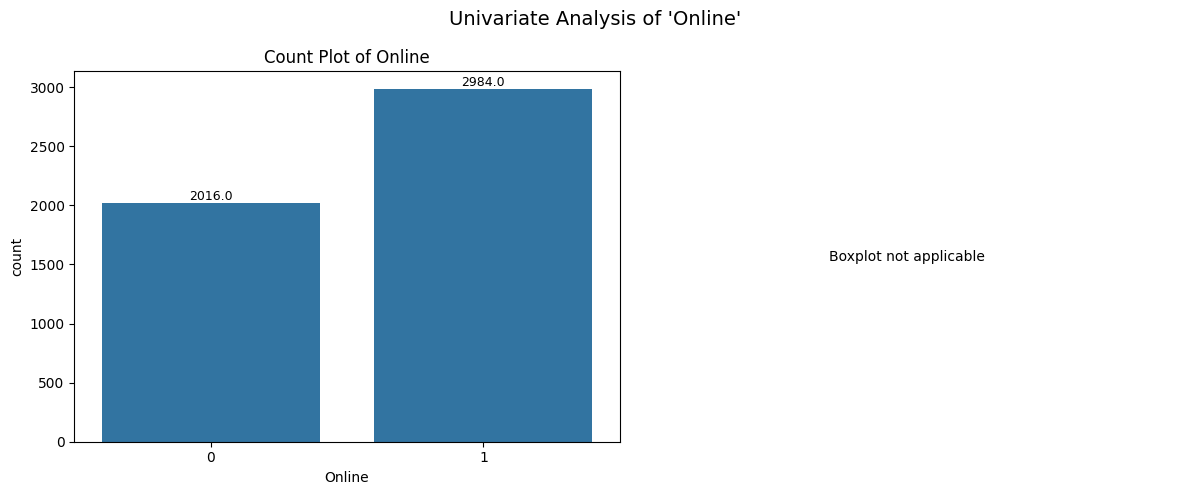

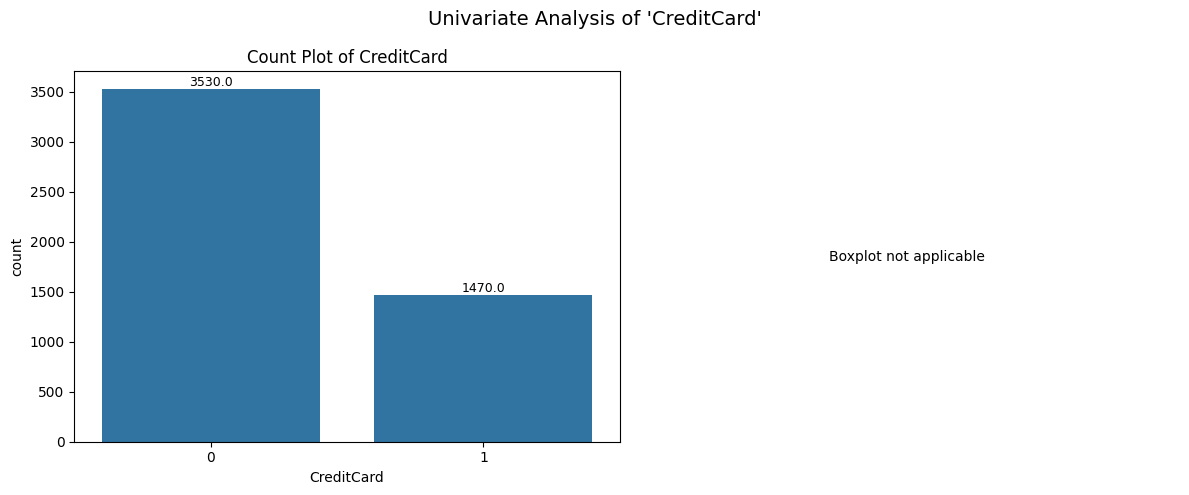

In [ ]:
#univariate analysis
for col in df.columns:
    plt.figure(figsize=(12, 5))

    # Histogram or Count Plot
    plt.subplot(1, 2, 1)
    if df[col].dtype.name == 'category' or df[col].nunique() < 10:
        ax = sns.countplot(x=df[col])
        plt.title(f"Count Plot of {col}")

        # Add count labels
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9)
    else:
        sns.histplot(df[col], kde=True)
        plt.title(f"Histogram of {col}")

    # Boxplot or message
    plt.subplot(1, 2, 2)
    if df[col].dtype.name != 'category' and df[col].nunique() > 1:
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
    else:
        plt.text(0.5, 0.5, 'Boxplot not applicable', ha='center', va='center')
        plt.axis('off')

    plt.suptitle(f"Univariate Analysis of '{col}'", fontsize=14)
    plt.tight_layout()
    plt.show()

**Observations:**
*   **Age**: This column is uniformly distributed between ages 30 to 60. Expected characteristics emphasing majority of active customers are between the working age limits   
*   **Experience** : This column is also uniformly distributed between 0 to 40 years. The pattern looks similar to Age.
*   **Income**: This column is right skewed. There are outliers with higher income candidates in the dataset
*   **Zipcode** : This does not have any specific pattern. Certain zip code areas seems to have higher distribution of records. Area code **96** has the least records while **94** has the most
*   **Family**: Here are the counts for each category - **1**:1472, **2**:1296, **3**:1010, **4**:1222
*   **CCAvg**: This is right skewed with lot of outliers with higher CCAvg. This plot is similar to Income field
*   **Education** : Here are the distince values with counts - **1**:2096 , **2**:1403, **3**:1501
*    **Mortgage**: Heavy skew with no mortgage customers. As a result most of the customers with mortgages are considered as outliers
*   **Personal Loan**: Highly imbalanced with only **9**% customers opting for loans.
*   **Securities Account :** Similar to personal loan . Only **10.5%** customers had securities acccount
*   **CD Account:** Similar to personal loan and securities account. Only **6**% have CD accounts
*   **Online** : Higher number of customers opted for online . **Online**: 2984, **Offline**: 2016
*  **Credit card **: Around 1470 customers have credit card (around 29.4%)













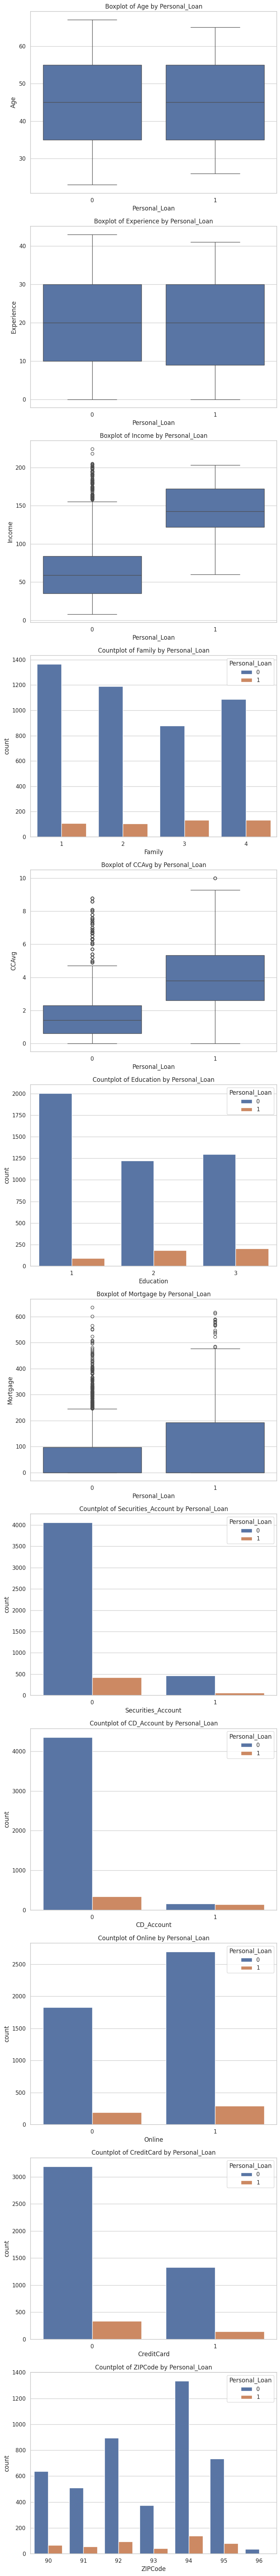

In [ ]:
#Bivariate Analysis

target_col = 'Personal_Loan'

# Feature columns
feature_cols = [
    'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
    'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode'
]

# Set up style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6 * len(feature_cols)))

# Loop through each feature
for i, col in enumerate(feature_cols, 1):
    plt.subplot(len(feature_cols), 2, 2 * i - 1)

    if df[col].nunique() <= 10:
        # For categorical features - use countplot grouped by target
        sns.countplot(data=df, x=col, hue=target_col)
        plt.title(f"Countplot of {col} by {target_col}")
    else:
        # For numerical features - use boxplot
        sns.boxplot(data=df, x=target_col, y=col)
        plt.title(f"Boxplot of {col} by {target_col}")


plt.tight_layout()
plt.show()

**Observations : **

*   **Age **: **No impact** as we can see similar age range for both with and without personal loan

*  E**xperience **: Similar to Age, **no impact** on the personal loan attribute

*   **Income :**  On average, **middle income** customers have Personal loans, while **very high (outliers) and lower income customers** donot have loans.

*  **CCAvg** : Follows similar pattern to income,  **middle CCAvg** customers have Personal loans, while ** very high (outliers) and lower CCAvg customers** donot have loans.

*  **Mortgage**: Loan takers tend to have higher mortgage values.

* **Education**: People with higher education (level 3) are more likely to take loans.

* **Family**: Loan uptake varies by family size; Family size 4 seems to correlate more with loan acceptance.

* **CD_Account & Securities_Account:** Strong correlation—people with CD accounts are far more likely to take a personal loan.

* **CreditCard**: People with credit cards are more likely to take loans.

* **Online**: Online users are more likely to have loans, though difference is not as stark.





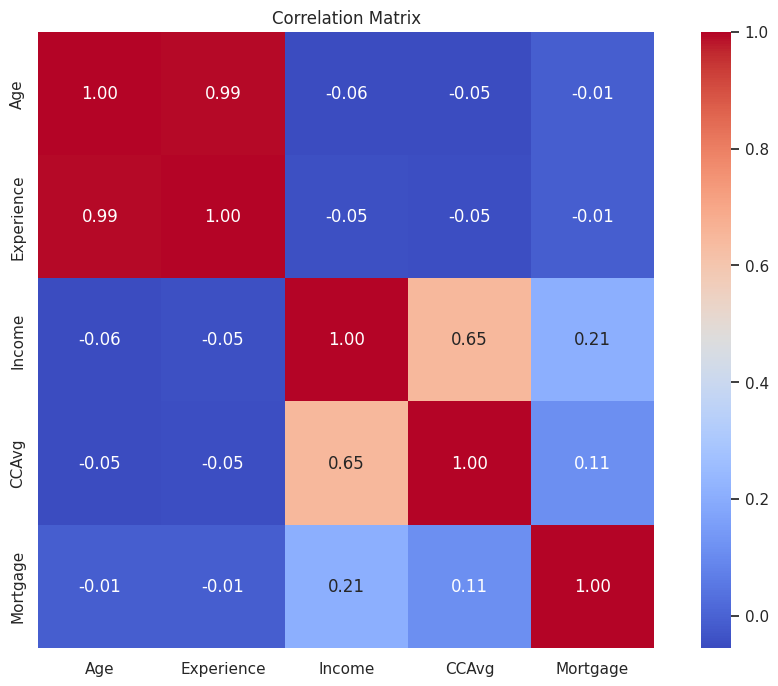

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

**Observation:**

Age and experience are directly correlated resulting in multicolinearity

In [ ]:
# Remove Experience to avoid multicolinearity with Age column
X = df.drop(["Personal_Loan", "Experience"], axis=1)
Y = df["Personal_Loan"]

# One hot encoding for zipcode and education column
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Build train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print(f"Training set count: {X_train.count()}")
print(f"Testing set count: {X_test.count()}")


Training set count: Age                   3500
Income                3500
Family                3500
CCAvg                 3500
Mortgage              3500
Securities_Account    3500
CD_Account            3500
Online                3500
CreditCard            3500
ZIPCode_91            3500
ZIPCode_92            3500
ZIPCode_93            3500
ZIPCode_94            3500
ZIPCode_95            3500
ZIPCode_96            3500
Education_2           3500
Education_3           3500
dtype: int64
Testing set count: Age                   1500
Income                1500
Family                1500
CCAvg                 1500
Mortgage              1500
Securities_Account    1500
CD_Account            1500
Online                1500
CreditCard            1500
ZIPCode_91            1500
ZIPCode_92            1500
ZIPCode_93            1500
ZIPCode_94            1500
ZIPCode_95            1500
ZIPCode_96            1500
Education_2           1500
Education_3           1500
dtype: int64


## Model Building

### Model Evaluation Criterion. (Picked the function from full code)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

* Confusion matrix and metrics like accuracy, precision, f1 score and recall will aid in evaluting performance of the model


### Model Building

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

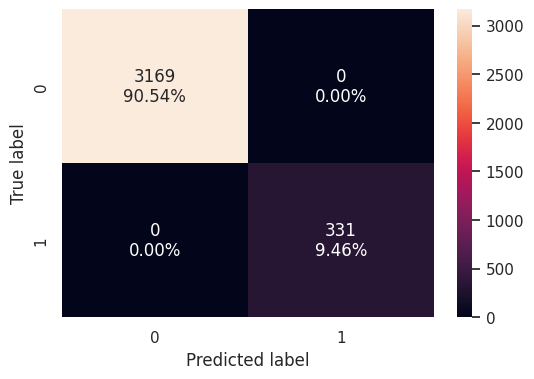

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


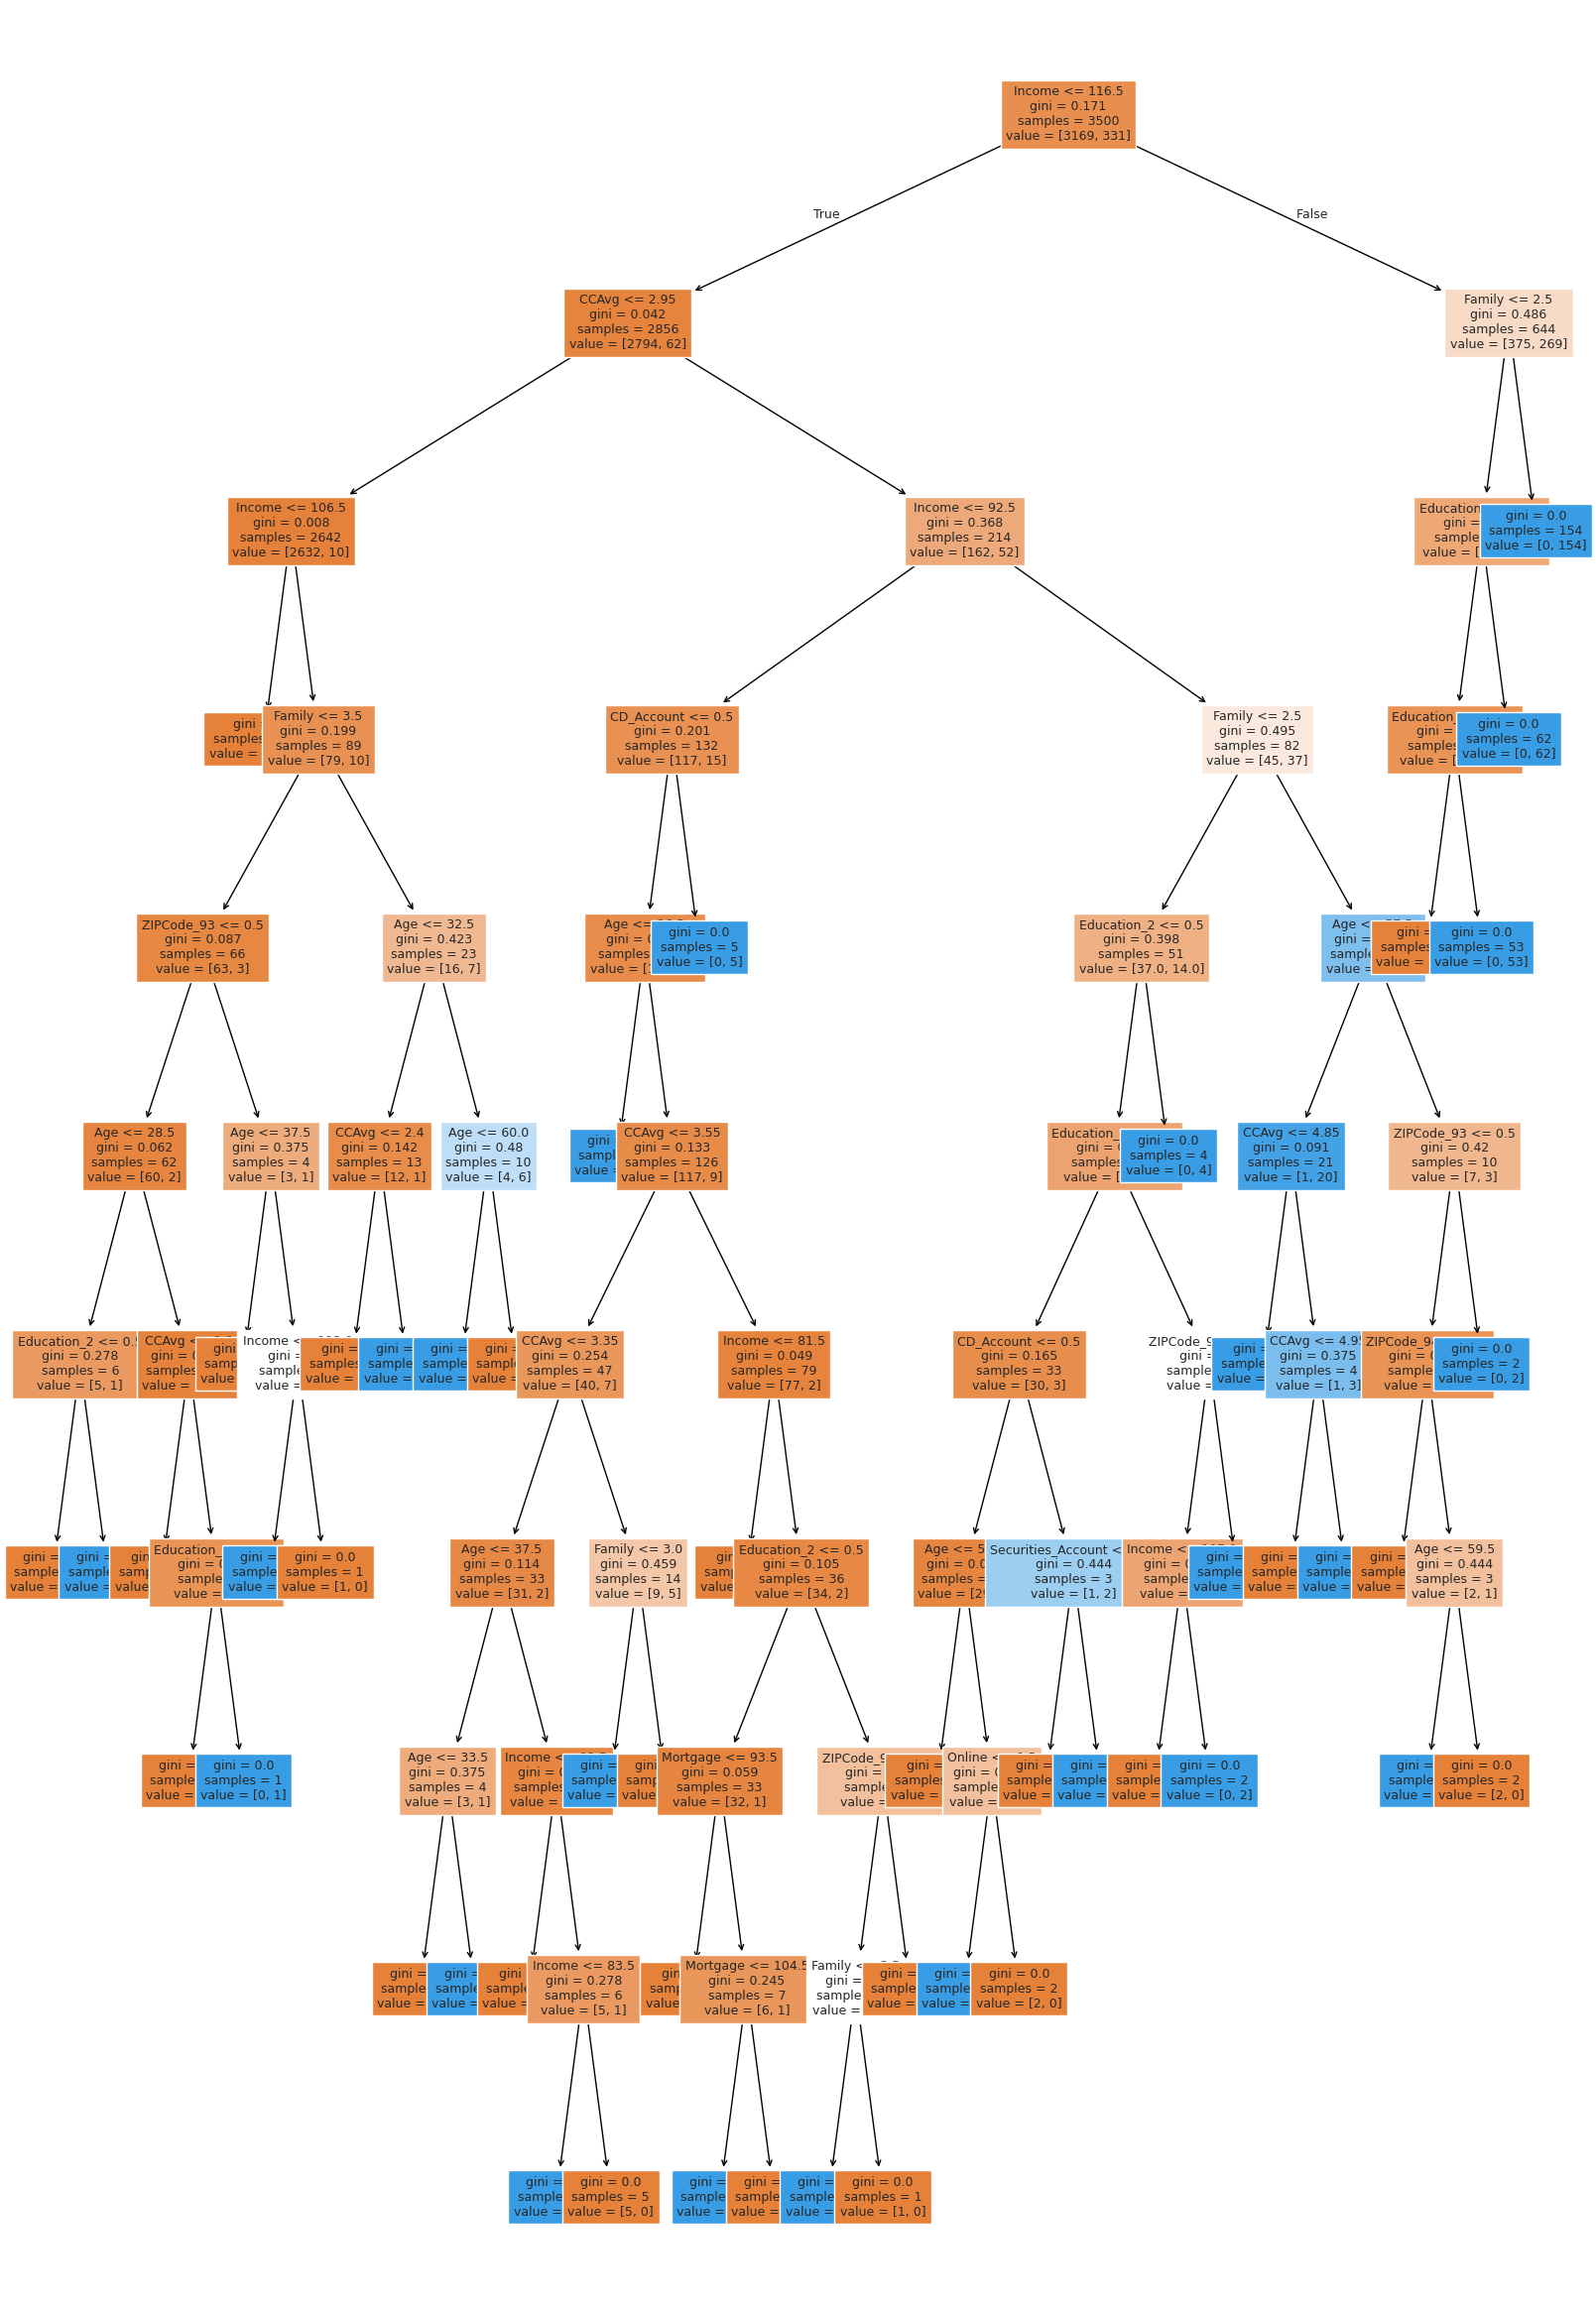

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Securities_Account  0.002224
Online              0.002224
ZIPCode_91          0.000556
CreditCard          0.000000
ZIPCode_92          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


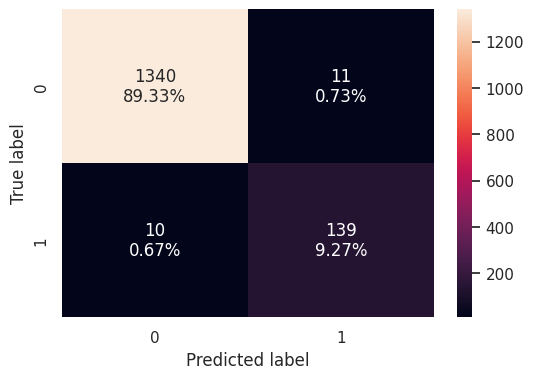

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

**Observations**

- The default model predicts with 100% accuracy based on training set
- This model is overfitting as it accounts for the noise too
- This model is highly complex as it is accounting for outlier, noise and actual data

## Model Performance Improvement

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=1
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [ ]:
estimator = best_estimator
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

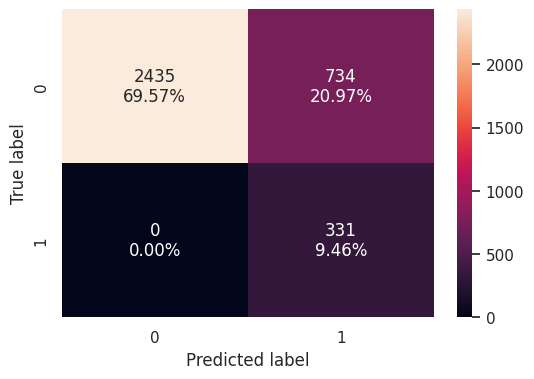

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


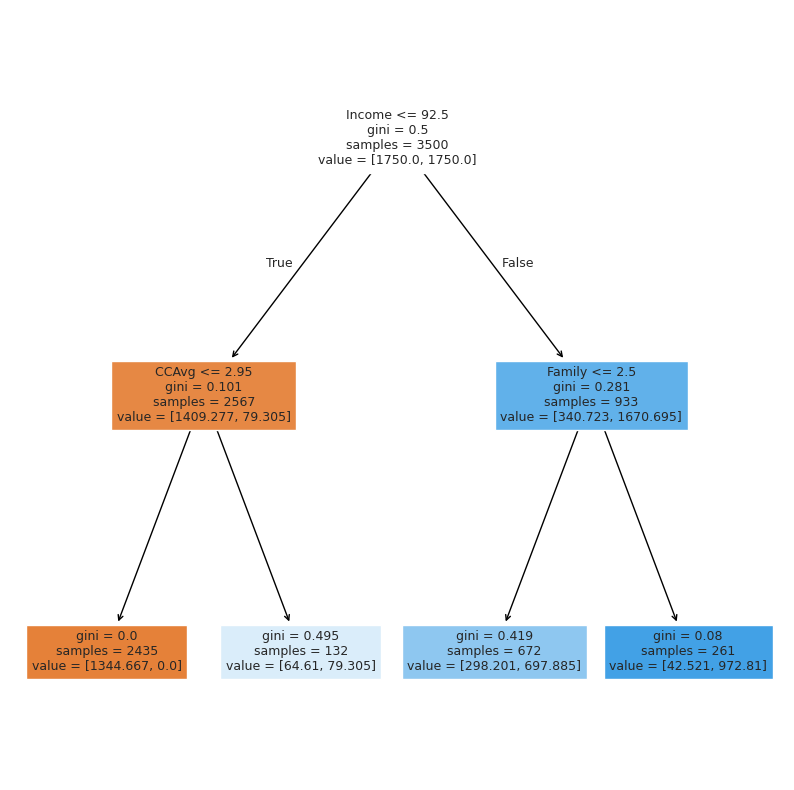

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


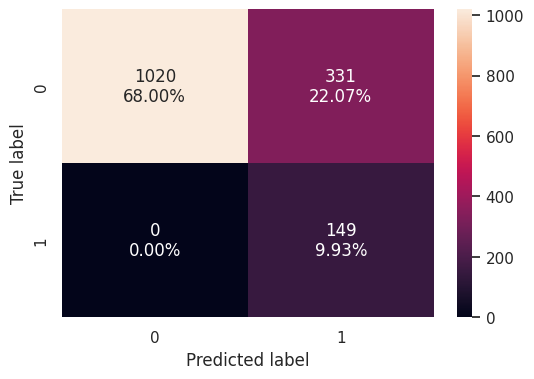

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.876529
CCAvg               0.066940
Family              0.056531
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Education_2         0.000000
Education_3         0.000000


**Observation**:

- Based on the different parameters tested, the best pre pruned model had the following characteristics

Max depth: 2,
Max leaf nodes: 50,
Min samples split: 10,
Best test recall score: 1.0

- This model has a gini score of 0.49 for couple of the nodes which is highly inefficient and does not really give a clear decision

- Though the recall score is 1 for test and training dataset, it does not utilize the features effectively

In [ ]:
X_train.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92',
       'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2',
       'Education_3'],
      dtype='object')

In [ ]:
#Post pruning of the model based on cost complexity
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


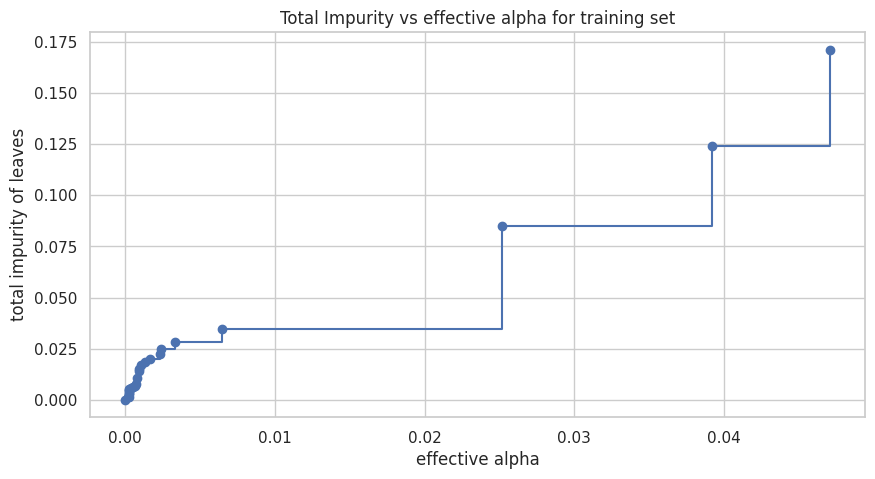

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


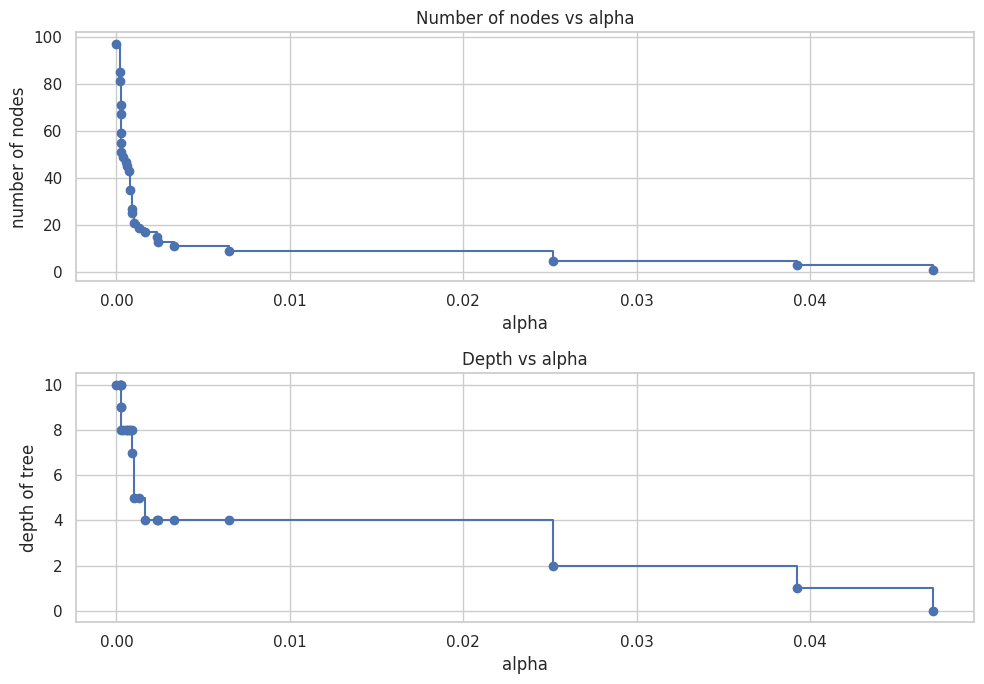

In [ ]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

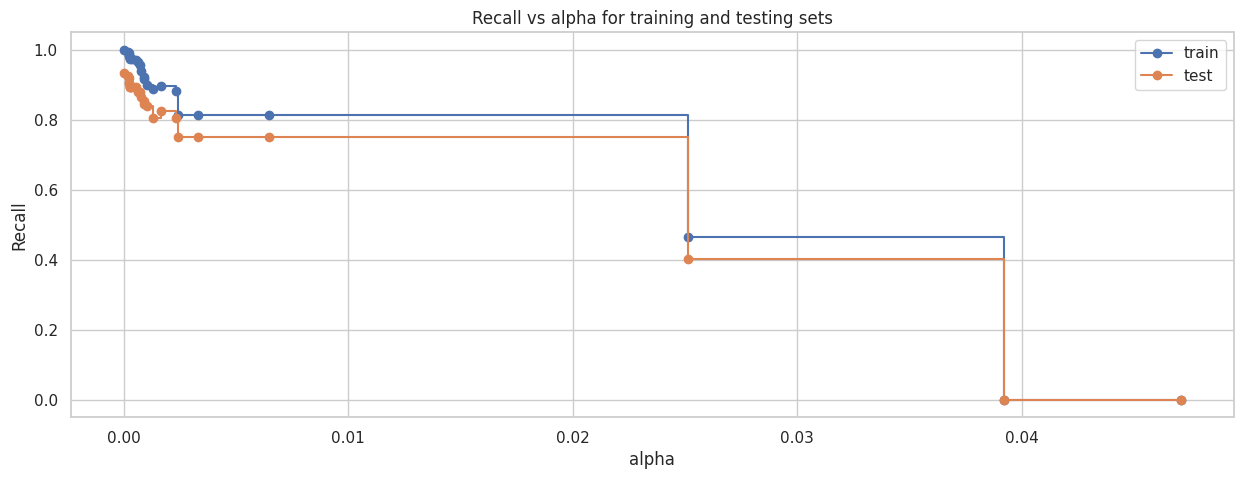

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)
print(recall_test[0])

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=1)
0.9328859060402684


In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1 )
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

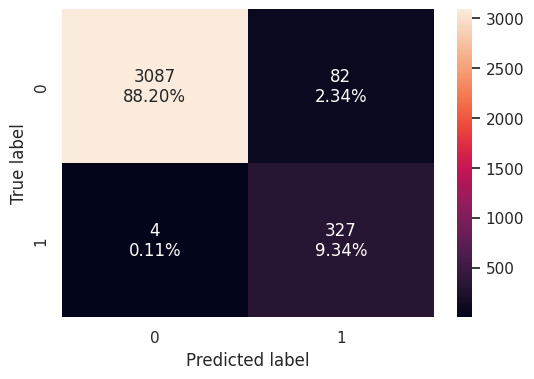

In [ ]:
confusion_matrix_sklearn(estimator_2, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.975429,0.987915,0.799511,0.883784


In [ ]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test) ## Complete the code to check performance on train data
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.968667,0.932886,0.789773,0.855385


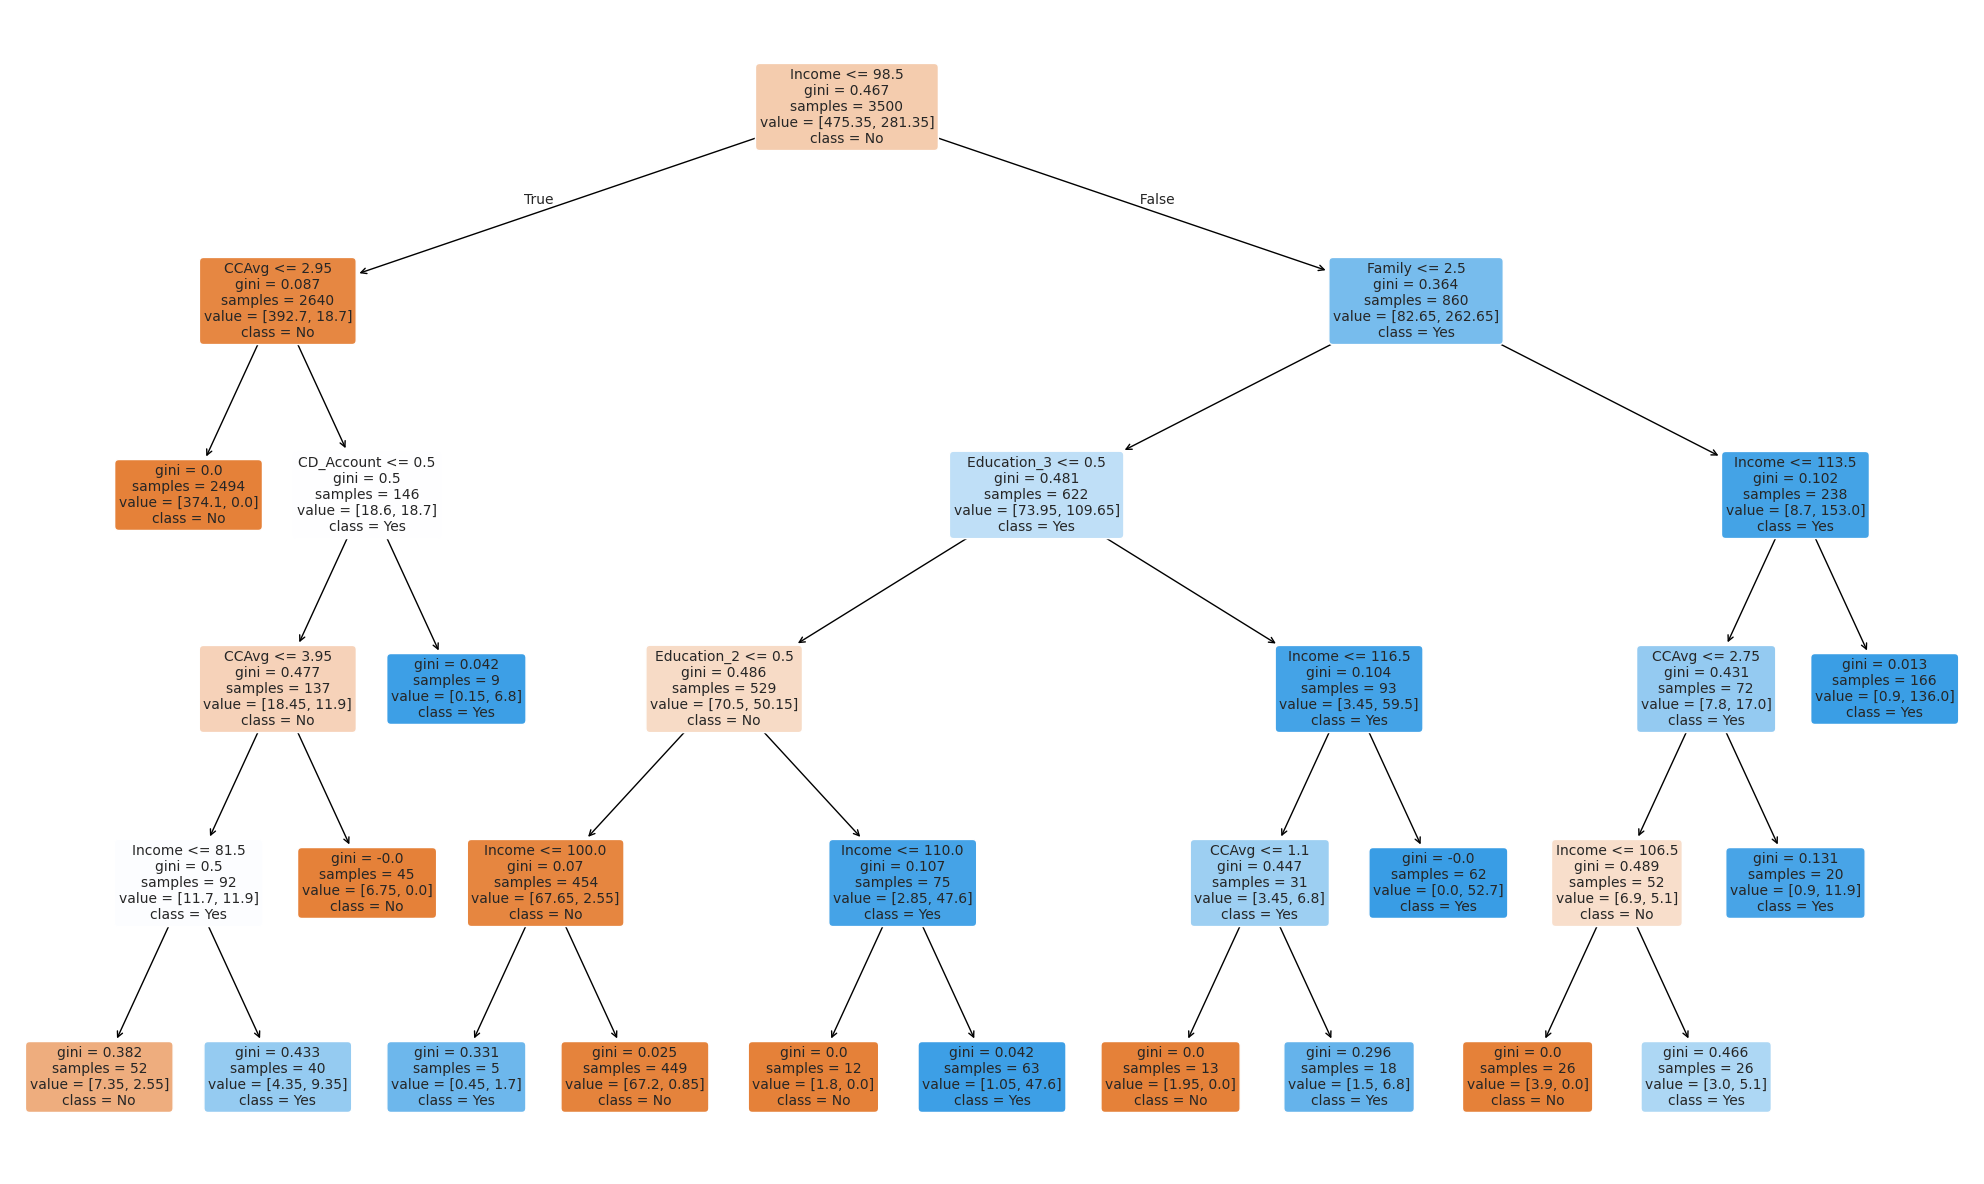

In [ ]:
plt.figure(figsize=(20, 12))  # Larger size for less overlap
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=10,         # Adjust as needed
    node_ids=False,
    class_names=["No", "Yes"],  # Optional, if target is binary
    rounded=True,        # Optional for aesthetics
    proportion=False      # Use True if you want to normalize samples at each node
)

# Add arrows if missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.tight_layout()
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [11.70, 11.90] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.15, 6.80] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 100.00
|   |   |   |   |   |--- weights: [0.45, 1.70] class: 1
|   |   |   |   |--- Income >  100.00
|   |   |   |   |   |--- weights: [67.20, 0.85] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- weights: [1.80, 0.00] class: 0
|   |   |   |   |--- Income >  110.00
|   |   |   |   |   |--- weights: [1.05, 47.60] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [3.45, 59.50] clas

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.628714
Education_2         0.150473
Education_3         0.072248
CCAvg               0.071238
Family              0.065218
CD_Account          0.012109
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
CreditCard          0.000000
Online              0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


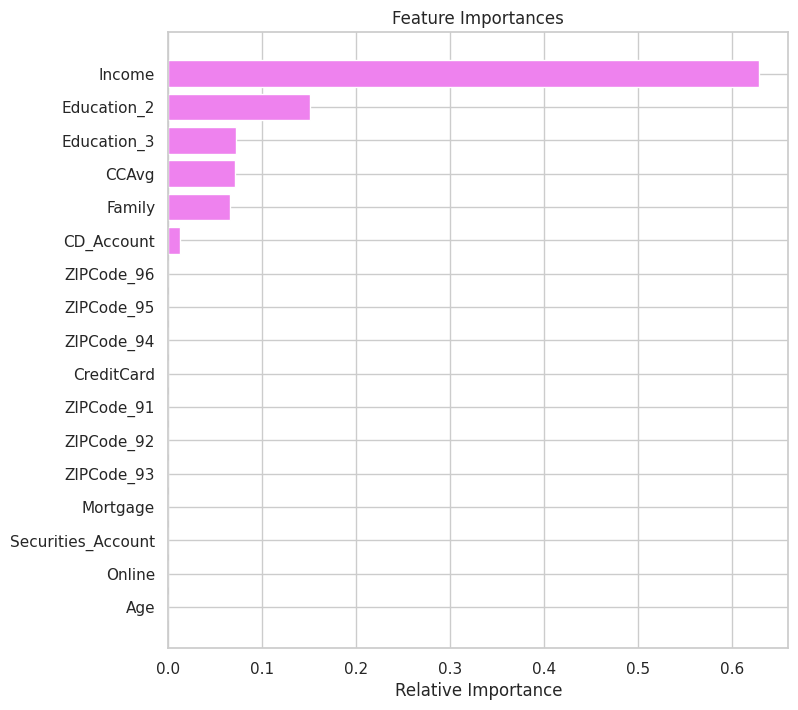

In [ ]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

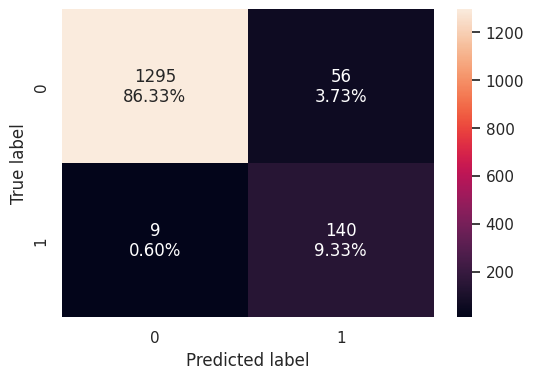

In [ ]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)

In [ ]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test) ## Complete the code to get the model performance on test data
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.956667,0.939597,0.714286,0.811594


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.790286,0.962571
Recall,1.0,1.000000,0.978852
Precision,1.0,0.310798,0.723214
F1,1.0,0.474212,0.831836


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.779333,0.956667
Recall,0.932886,1.000000,0.939597
Precision,0.926667,0.310417,0.714286
F1,0.929766,0.473768,0.811594


**Observations:**
*   **Models considered**: Default, Pre pruned, post pruned
*   **Metric utilized**: Recall: Since our objective is to increase the conversion of liability customers. We are comfortable with false positives.
*   Out of the three models considered, **Post pruned model** has the best utilization of all the features along with high recall scores
*   Though Default model has good scores, it has the issue of overfitting with complex model











## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

**- Key Insights:**

The Decision Tree model splits customers based on their attributes to predict loan acceptance. Based on feature importance and splits, the most influential features are:

- **Income**:  Customers with higher annual income (e.g., >$98.5k) are much more likely to take personal loans.

- **CD Account**: A strong indicator; customers with a CD account are far more likely to accept loans.

- **Education** – Higher education level (Graduate or Professional) increases the likelihood.

- **CCAvg** (Credit Card Spend) – Higher monthly spending indicates financial activity, increasing conversion probability.

- **Online Banking** – Indicates digital engagement, linked with higher conversion

**Sample Rule**

If a customer:

Has Income > $90K, and

Holds a CD Account, and

Has Education level ≥ 2 (Graduate/Professional)

Then they are highly likely to accept a personal loan.


**Strategic Recommendations**
1. Target High-Income Customers with CD Accounts
These customers showed the highest conversion probability in the decision tree.

Personalize loan offers with better interest rates or bundled services.

2. Prioritize Customers with High Education and High CCAvg
They're financially active and credit-eligible.

Likely to respond to well-designed digital marketing campaigns.

3. Leverage Online and Cross-Product Engagement
Customers who use online banking or credit cards from other banks can be targeted with digital-only offers or app notifications.

4. Skip/Deprioritize Low-Income, Low-Activity Customers
Customers with low income, no CD or securities accounts, and low card usage are less likely to convert.

Avoid over-targeting them to reduce campaign cost

___